# pH calculation with CBE method

## pH calculation based on CBE

Note: CBE stands for charge balance equation

**Calculation of pH of 0.01 M HCl solution**

In [4]:
from calculation import *

HCl = Inert(charge=-1, conc=0.01)
pH = CBE_calc(HCl)
pH.pH_calc()

print(pH.pH)

1.9999977111816385


**Calculation of pH of 0.01 M NaOH solution**

In [2]:
from calculation import *

NaOH = Inert(charge=1, conc=0.01)
pH = CBE_calc(NaOH)
pH.pH_calc()

print(pH.pH)

11.995676422119143


**Calculation of Buffer solution**

In [3]:
# How about a buffer?
HAc = Acid(charge=0, conc=0.1, Ka=1.8e-5) # acetic acid
NaAc = Inert(charge=1, conc=0.1)

pH = CBE_calc(HAc, NaAc)
pH.pH_calc()

print(pH.pH)

8.870227050781251


**Plot the concentration of components in a phosphate solution**

[3.71285585e-06 3.97839672e-01 6.02154711e-01 1.90418039e-06]


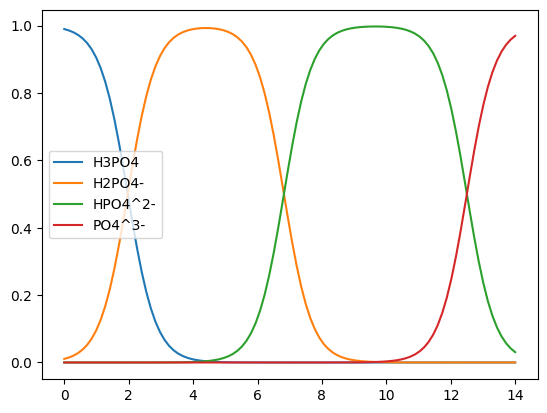

In [4]:
# Phosphate buffer?
pKa = [1.97, 6.82, 12.5] # data from pKa_data
P = Acid(charge=0, conc=0.1, pKa=pKa)
print(P.alpha(7.0))

# Plot
import matplotlib.pyplot as plt
import numpy as np

pH_values = np.linspace(0, 14, 100)

alpha = [P.alpha(pH) for pH in pH_values]

plt.plot(pH_values, alpha)
plt.legend(['H3PO4', 'H2PO4-', 'HPO4^2-', 'PO4^3-'])
plt.show()

In [11]:
NH4 = Acid(charge=1, conc=0.01*3, pKa=9.25)
pKa = [1.97, 6.82, 12.5]
P = Acid(charge=0, conc=0.01, pKa=pKa)

pH = CBE_calc(NH4, P)
pH.pH_calc()

print(pH.pH)

8.952952575683597


**Calculation of pH and concentration of components in a Calcium carbonate solution**

12.023255157470702


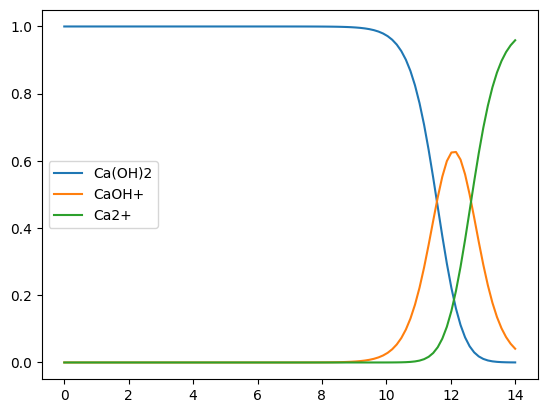

In [5]:
# weak base, like Ca(OH)2
CaOH2 = Acid(charge=+2, conc=0.01, pKa=[14 - 1.37, 14 - 2.43])
pH = CBE_calc(CaOH2)
pH.pH_calc()

print(pH.pH)

pH_values = np.linspace(0, 14, 100)

alpha = [CaOH2.alpha(pH) for pH in pH_values]

plt.plot(pH_values, alpha)
plt.legend(['Ca(OH)2', 'CaOH+', 'Ca2+'])
plt.show()

## Draw the Charge Balance curve

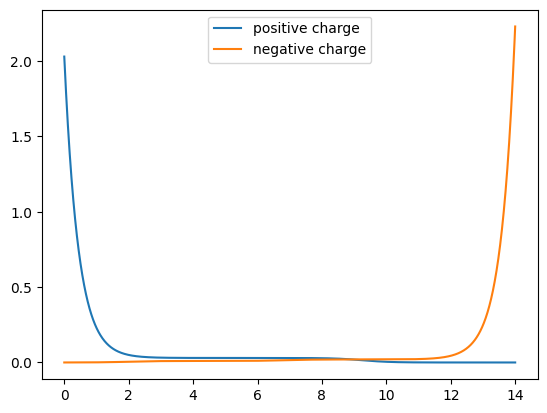

In [26]:
NH4 = Acid(charge=1, conc=0.01*3, pKa=9.25)
pKa = [1.97, 6.82, 12.5]
P = Acid(charge=0, conc=0.01, pKa=pKa)

def ChargeBalance(_Acid, pH):
    Kw = 1.1e-14

    h3o = 10.**(-pH)
    oh = Kw / h3o

    pos = h3o
    neg = oh

    alpha = _Acid.alpha(pH)
    charge = _Acid.charge
    conc = _Acid.conc

    for i in range(len(alpha)):
        if charge[i] > 0:
            pos += alpha[i] * conc * charge[i]
        if charge[i] < 0:
            neg += alpha[i] * conc * np.abs(charge[i])
    
    return pos, neg

pH_values = np.linspace(0, 14, 1500)

pos = []
neg = []

for pH in pH_values:
    p_n, n_n = ChargeBalance(NH4, pH)
    P_p, P_n = ChargeBalance(P, pH)
    pos.append(p_n + P_p)
    neg.append(n_n + P_n)

plt.plot(pH_values, pos)
plt.plot(pH_values, neg)
plt.legend(['positive charge', 'negative charge'])
plt.show()

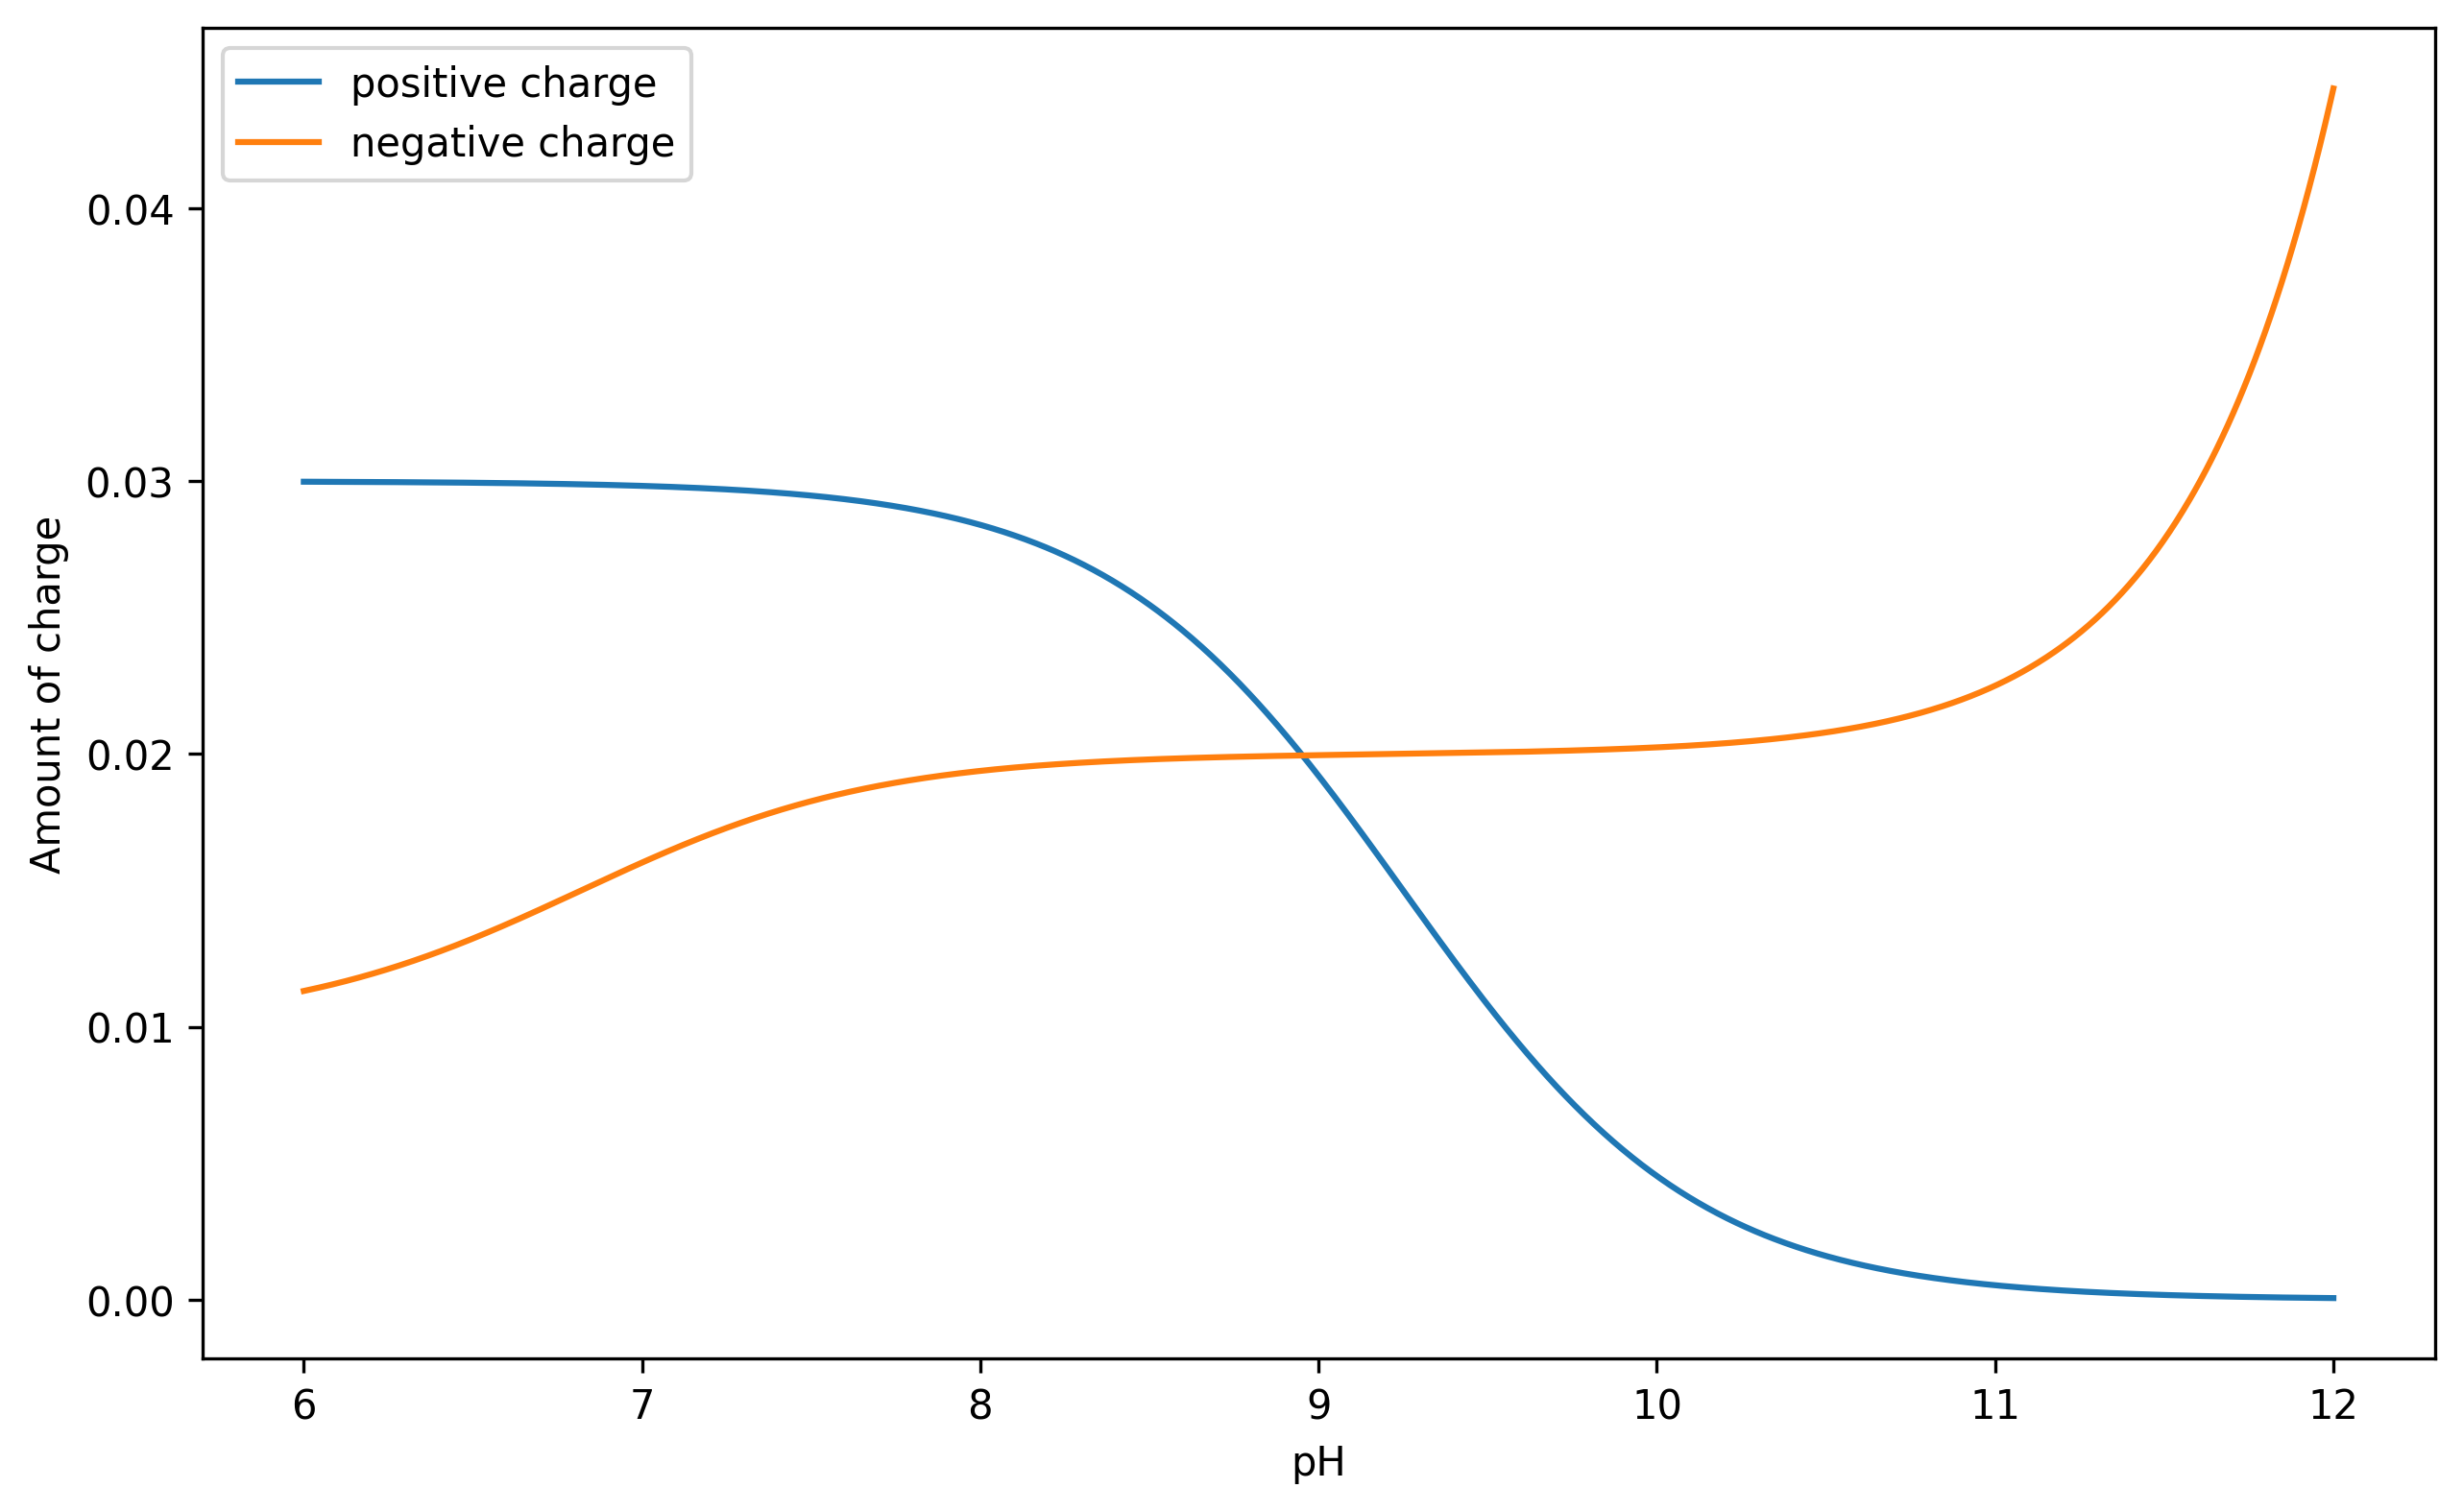

In [58]:
NH4 = Acid(charge=1, conc=0.01*3, pKa=9.25)
pKa = [1.97, 6.82, 12.5]
P = Acid(charge=0, conc=0.01, pKa=pKa)

pH_values = np.linspace(6, 12, 1500)
pos = []
neg = []

for pH in pH_values:
    p_n, n_n = ChargeBalance(NH4, pH)
    P_p, P_n = ChargeBalance(P, pH)
    pos.append(p_n + P_p)
    neg.append(n_n + P_n)

# make the plot look better
plt.figure(figsize=(10, 6), dpi=300)
plt.xlabel('pH')
plt.ylabel('Amount of charge')

plt.plot(pH_values, pos)
plt.plot(pH_values, neg)
plt.legend(['positive charge', 'negative charge'])

# # Mark the isoelectric point, where the two lines intersect
# pH = pH_values[np.argmin(np.abs(np.array(pos) - np.array(neg)))]
# plt.plot(pH, pos[np.argmin(np.abs(np.array(pos) - np.array(neg)))] , 'ro')
# # plt.text(pH, pos[np.argmin(np.abs(np.array(pos) - np.array(neg)))] , 'Isoelectric point: pH = %.2f' % pH, fontsize=12)

plt.show()

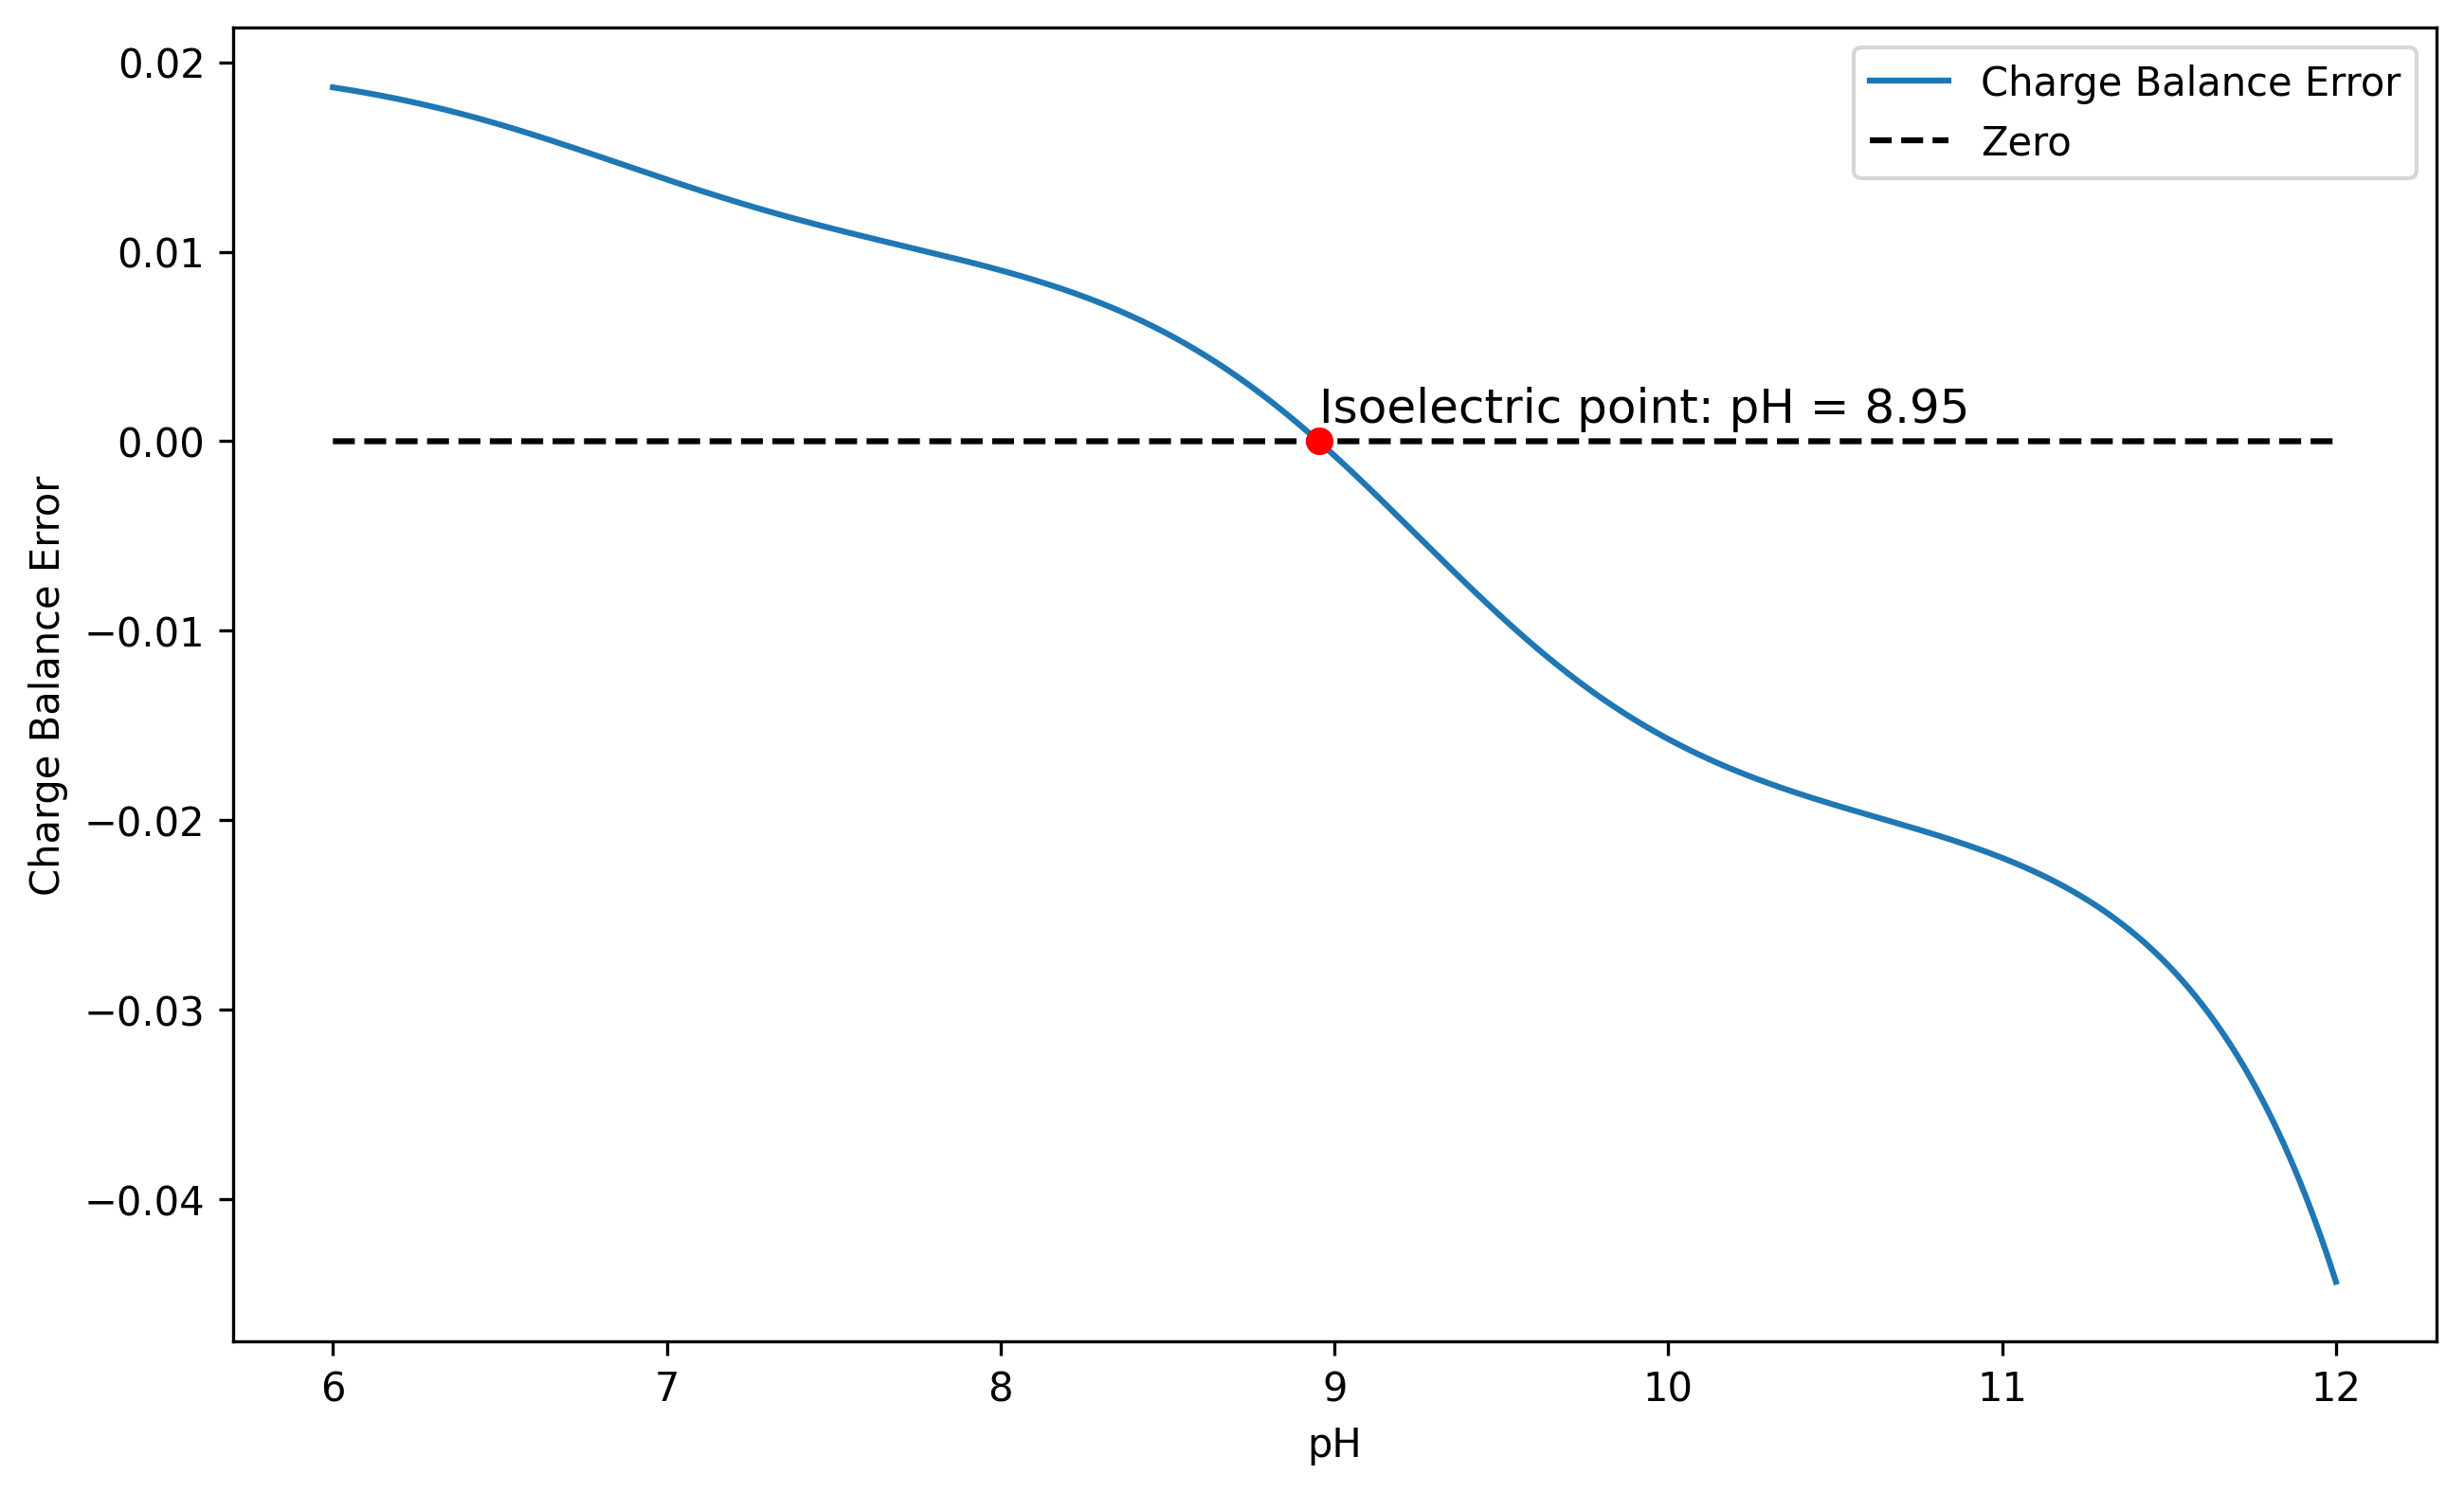

In [56]:
NH4 = Acid(charge=1, conc=0.01*3, pKa=9.25)
pKa = [1.97, 6.82, 12.5]
P = Acid(charge=0, conc=0.01, pKa=pKa)

pH_values = np.linspace(6, 12, 1500)
pos = []
neg = []

for pH in pH_values:
    p_n, n_n = ChargeBalance(NH4, pH)
    P_p, P_n = ChargeBalance(P, pH)
    pos.append(p_n + P_p)
    neg.append(n_n + P_n)

# make the plot look better
plt.figure(figsize=(10, 6), dpi=300)
plt.xlabel('pH')
plt.ylabel('Charge Balance Error')

plt.plot(pH_values, np.array(pos) - np.array(neg))
plt.plot(pH_values, np.zeros_like(pH_values), 'k--')

# Mark the isoelectric point, where the two lines intersect
pH = pH_values[np.argmin(np.abs(np.array(pos) - np.array(neg)))]
plt.plot(pH, 0 , 'ro')
plt.text(pH, 0 + 0.001 , 'Isoelectric point: pH = %.2f' % pH, fontsize=12)

plt.legend(['Charge Balance Error', 'Zero'])
plt.show()

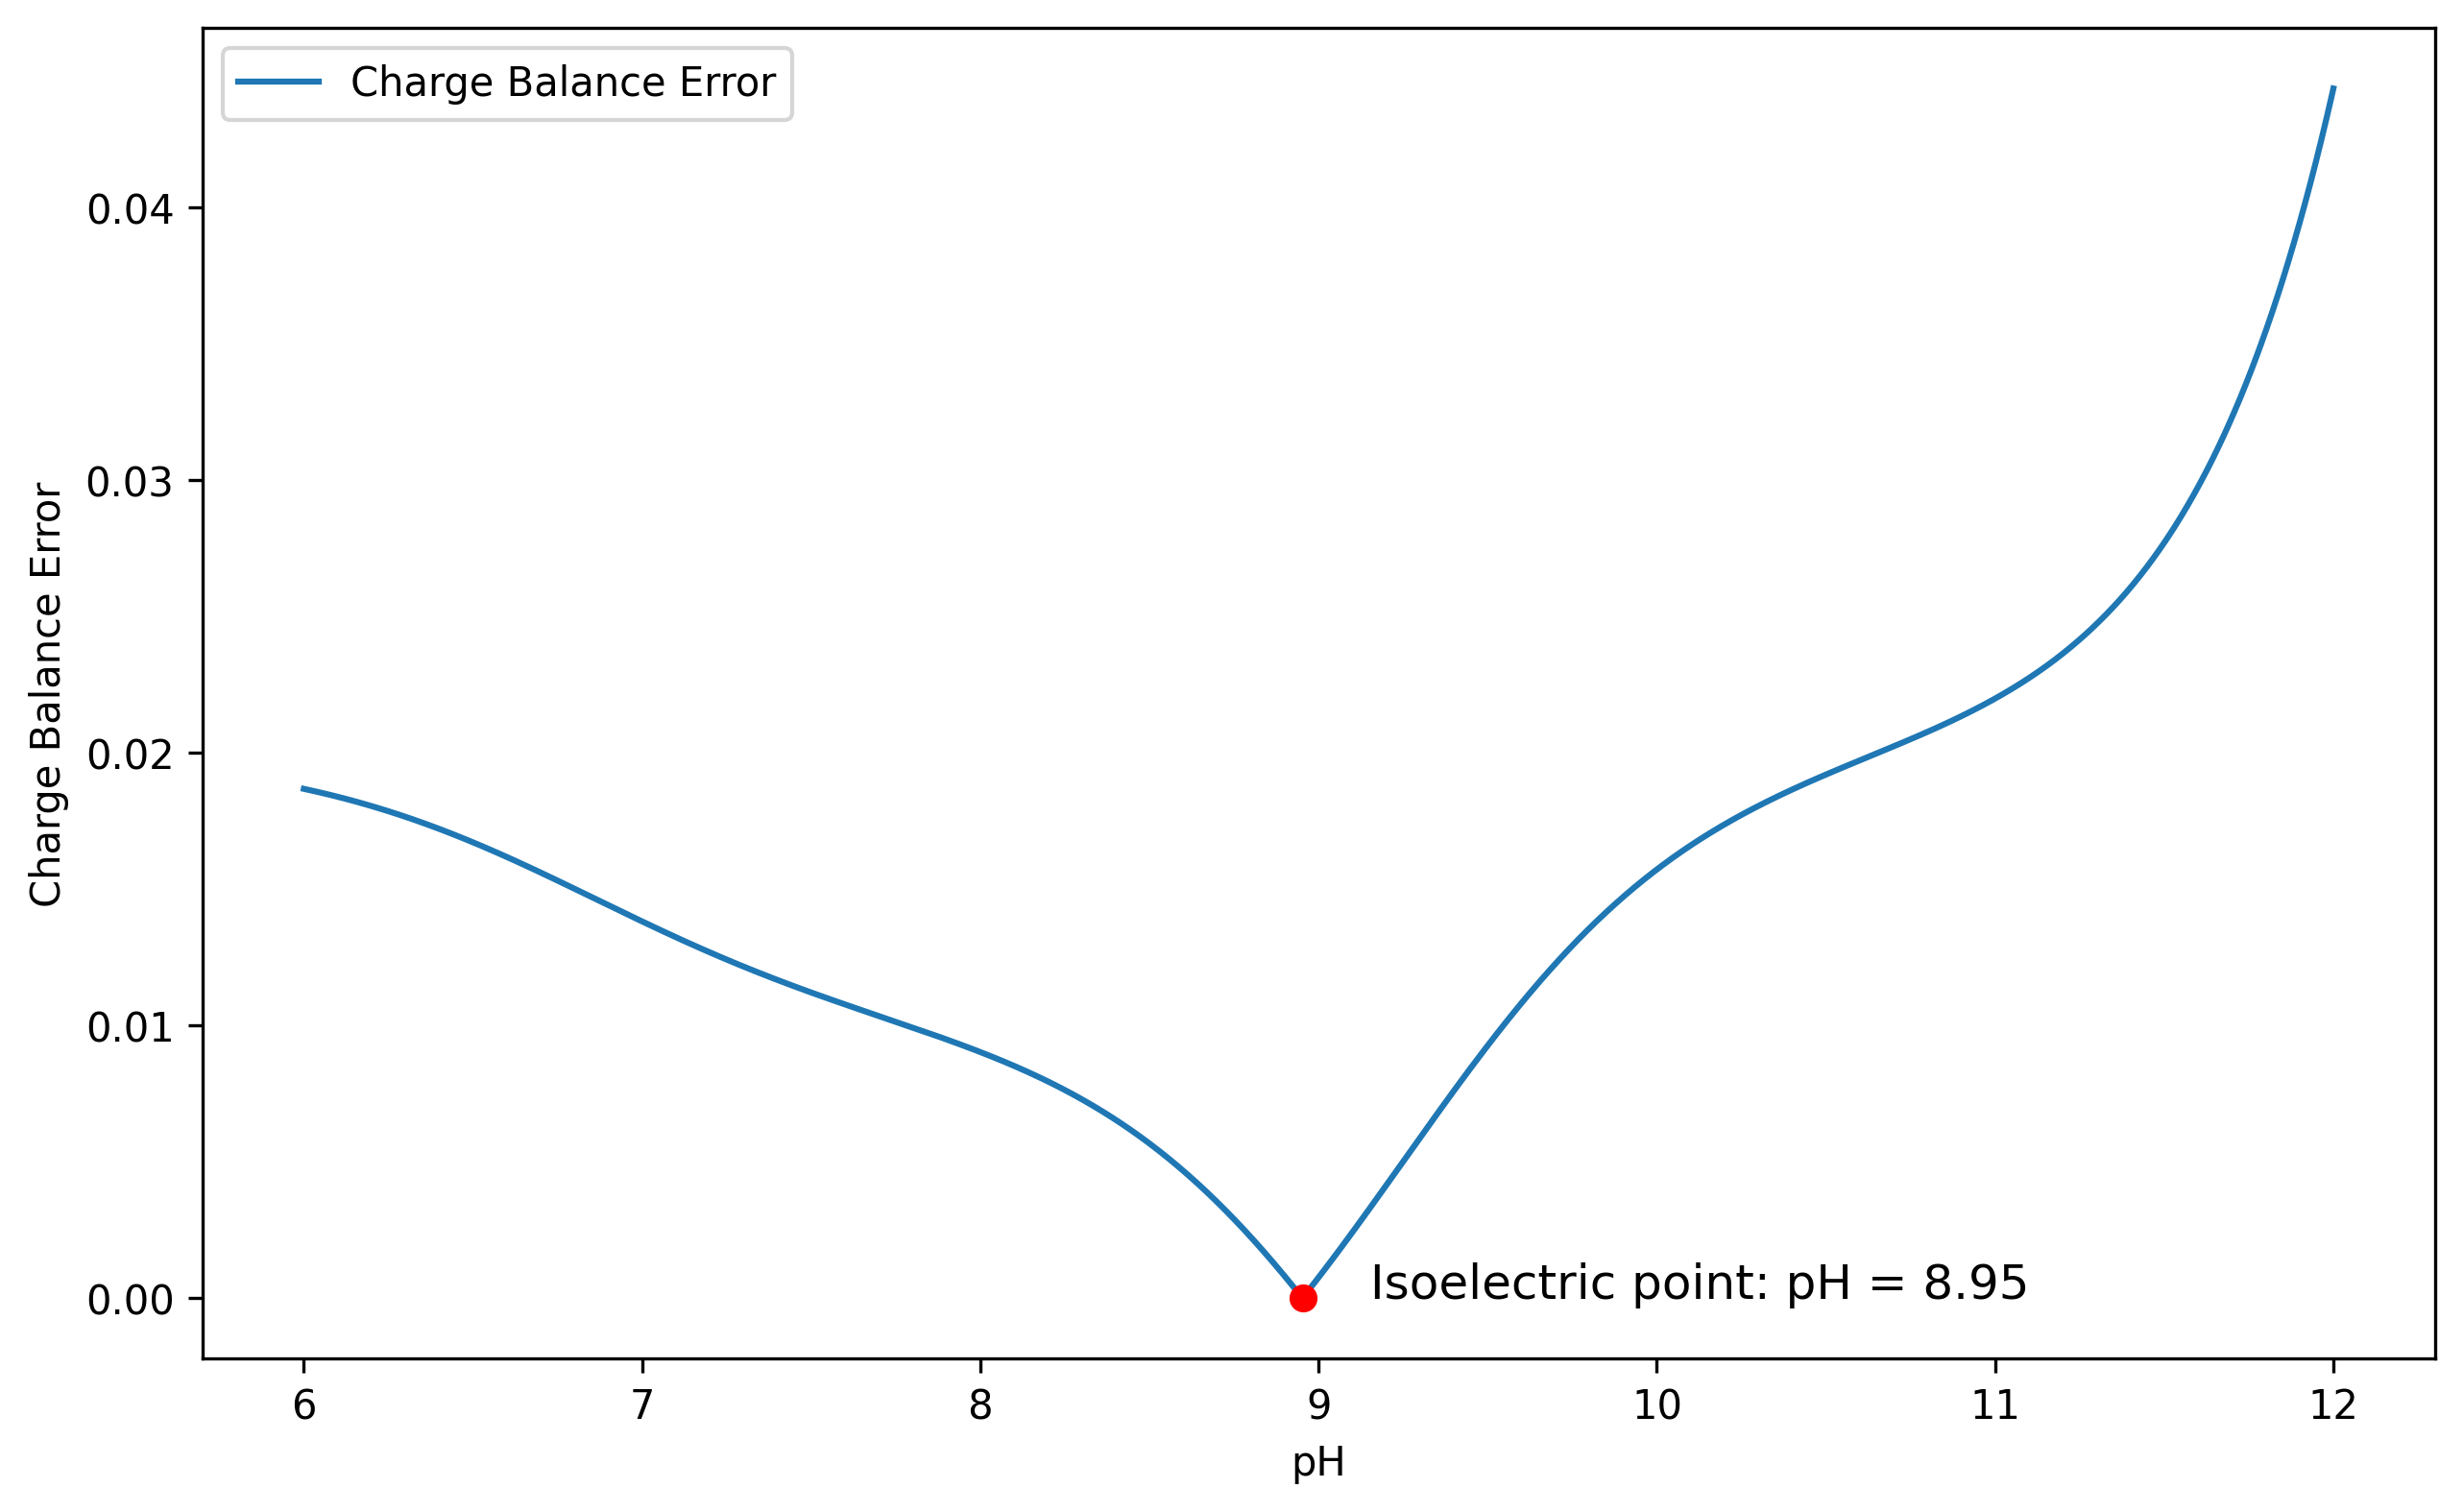

In [59]:
NH4 = Acid(charge=1, conc=0.01*3, pKa=9.25)
pKa = [1.97, 6.82, 12.5]
P = Acid(charge=0, conc=0.01, pKa=pKa)

pH_values = np.linspace(6, 12, 1500)
pos = []
neg = []

for pH in pH_values:
    p_n, n_n = ChargeBalance(NH4, pH)
    P_p, P_n = ChargeBalance(P, pH)
    pos.append(p_n + P_p)
    neg.append(n_n + P_n)

# make the plot look better
plt.figure(figsize=(10, 6), dpi=300)
plt.xlabel('pH')
plt.ylabel('Charge Balance Error')

plt.plot(pH_values, np.abs(np.array(pos) - np.array(neg)))
# Mark the isoelectric point, where the abs = 0
pH = pH_values[np.argmin(np.abs(np.array(pos) - np.array(neg)))]
plt.plot(pH, 0 , 'ro')
plt.text(pH + 0.2, 0 , 'Isoelectric point: pH = %.2f' % pH, fontsize=12)
plt.legend(['Charge Balance Error'])
plt.show()